### Parameters:
&emsp;$x$: number of assignees\
&emsp;$a$: Number of groups assigned to the project\
&emsp;$t$: estimated project workload for a single dev (hours)\
&emsp;$r_1$: intra-group productivity coefficient\
&emsp;$r_2$: inter-group productivity coefficient\
&emsp;$c$: average capability

### Functions:
&emsp;$I(x)$: Individual productivity


$$I(x,,a)=r_1^{(\frac{x}{a}-1)} \cdot r_2^{(a-1)} \cdot c$$


&emsp;$G(x)$: Group productivity

$$G(x, a)=x \cdot I(x)=x \cdot r_1^{(\frac{x}{a}-1)} \cdot r_2^{(a-1)} \cdot c$$


&emsp;$T(x,a)$: Function of the estimated project time with x assignees (hours)

$$T(x, a)=\frac{t}{G(x)}=\frac{t}{x \cdot r_1^{(\frac{x}{a}-1)} \cdot r_2^{(a-1)} \cdot c}$$


&emsp;$C(x)$: Function of the estimated project cost with $x$ assignees (in dev hours)

$$C(x, a)=\frac{t}{I(x)}=\frac{t}{r_1^{(\frac{x}{a}-1)} \cdot r_2^{(a-1)} \cdot c}$$

&emsp;$M_x(x, a^*)$: partial marginal benefit of increase x while a is a constant

$$ M_x(x, a^*) = \frac{\partial (-T - C)}{\partial x} = \frac{t \cdot (x \cdot ln(r_1) \cdot (1+x)+a)}{a \cdot x^2 \cdot r_1^{(\frac{x}{a}-1)} \cdot r_2^{(a-1)} \cdot c} $$


&emsp;$M_a(x^*, a)$: partial marginal benefit of increase a while x is a constant

$$ M_a(x^*, a)=\frac{\partial (-T - C)}{\partial a} = \frac{t \cdot (1+x) \cdot (x \cdot ln(r_1)-a^2 \cdot ln(r_2))}{a^2 \cdot x \cdot r_1^{(\frac{x}{a}-1)} \cdot r_2^{(a-1)} \cdot c} $$


In [59]:
import pandas as pd
from IPython.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import math


def f(x, t, r1, r2, a, c):
    try:
        x = int(x)
        t = float(t)
        r1 = float(r1)
        r2 = float(r2)
        a = int(a)
        c = float(c)
    except:
        print(
            "please enter numbers,decimal will round down to nearest integer when necessary"
        )
        out = None
        df1 = None
    else:
        if x <= 0 or t <= 0 or r1 <= 0 or r2 <= 0 or a <= 0 or c <= 0:
            print("please enter non zeros")
            return None
        if r1 > 1 or r1 < 0.5:
            print("warning: r1 should between 0.5 and 1")
        if r2 > 1 or r2 < 0.5:
            print("warning: r2 should between 0.5 and 1")
        table1 = {
            "x": [],
            "a": [],
            "Individual productivity": [],
            "overall productivity": [],
            "Estimated time (100 dev hours)": [],
            "Estimated cost (100 dev hours)": [],
            "project time average rate of change": [],
            "cost average rate of change": [],
            "margin (100hours)": [],
        }
        table2 = {"x": [], "-dT/dx - dC/dx (100 hours)": []}
        initial = True
        last_tp = None
        last_cp = None
        for x_i in range(max(1, x - 10), x + 10):
            table1["x"].append(x_i)
            a_i = min(x_i, a)
            table1["a"].append(a_i)
            i_p = r1 ** (x_i / a_i - 1) * r2 ** (a_i - 1) * c
            table1["Individual productivity"].append(i_p)
            g_p = x_i * i_p
            table1["overall productivity"].append(g_p)
            t_p = t / g_p / 100
            table1["Estimated time (100 dev hours)"].append(t_p)
            c_p = t / i_p / 100
            table1["Estimated cost (100 dev hours)"].append(c_p)
            if initial:
                table1["project time average rate of change"].append(None)
                table1["cost average rate of change"].append(None)
                table1["margin (100hours)"].append(None)
                initial = False
            else:
                t_rc = t_p - last_tp
                table1["project time average rate of change"].append(t_rc)
                c_rc = c_p - last_cp
                table1["cost average rate of change"].append(c_rc)
                table1["margin (100hours)"].append(-t_rc - c_rc)
            last_cp = c_p
            last_tp = t_p
            if x_i >= a:
                table2["x"].append(x_i)
                table2["-dT/dx - dC/dx (100 hours)"].append(
                    t
                    * (x_i * math.log(r1) * (1 + x_i) + a)
                    / (a * x_i**2 * r1 ** (x / a - 1) * r2 ** (a - 1) * c)
                    / 100
                )

        df1 = pd.DataFrame(table1)
        df2 = pd.DataFrame(table2)
        df1_1 = df1.style.set_caption(
            "Table 1-1: productivity, cost & estimated margin"
        )
        display(df1_1)
        plt.plot(
            df1["x"], df1["Individual productivity"], label="Individual productivity"
        )
        plt.plot(df1["x"], df1["overall productivity"], label="overall productivity")
        plt.plot(
            df1["x"],
            df1["Estimated time (100 dev hours)"],
            label="Estimated time (100 dev hours)",
        )
        plt.legend()
        plt.title("Graph1: Productivity")
        plt.axhline(y=0, color="k")
        plt.grid(True, which="both")
        plt.show()
        plt.plot(
            df1["x"],
            df1["Estimated time (100 dev hours)"],
            label="Estimated time (100 dev hours)",
        )
        plt.plot(
            df1["x"],
            df1["Estimated cost (100 dev hours)"],
            label="Estimated cost (100 dev hours)",
        )
        plt.legend()
        plt.title("Graph2: estimated workload(100 hours)")
        plt.axhline(y=0, color="k")
        plt.grid(True, which="both")
        plt.show()
        plt.plot(
            df1["x"],
            df1["project time average rate of change"],
            label="project time average rate of change",
        )
        plt.plot(
            df1["x"],
            df1["cost average rate of change"],
            label="cost average rate of change",
        )
        plt.plot(df1["x"], df1["margin (100hours)"], label="margin (100hours)")
        plt.legend()
        plt.title("Graph 3: Marginal benefit (average rate of change)")
        plt.axhline(y=0, color="k")
        plt.grid(True, which="both")
        plt.show()
        df2_1 = df2.style.set_caption("Table 1-2: margin (given a)")
        display(df2_1)
        plt.plot(
            df2["x"],
            df2["-dT/dx - dC/dx (100 hours)"],
            label="project time average rate of change",
        )
        plt.legend()
        plt.title("Graph4: Marginal benefit, -dT/dx - dC/dx (100 hours)")
        plt.axhline(y=0, color="k")
        plt.grid(True, which="both")
        plt.show()
    return None


# a=interact(f,x='number of assignee',t='project workload',r1='intra-group productivity coefficient',r2='inter-group productivity coefficient',a='number of groups',c='average capability')
a = interact(f, x="1", t="1600", r1="0.8", r2="0.8", a="2", c="1")



interactive(children=(Text(value='1', description='x'), Text(value='1600', description='t'), Text(value='0.8',…



### Finding optimal number of teams and assignees

We define $M(x)$ as the esitmated marginal benefit of increased number of teams and assignees

$ \qquad \qquad (1) \qquad \qquad M(x, a, dx, da)=-(\frac{\partial T}{\partial x} \cdot dx + \frac{\partial T}{\partial a} \cdot da) - (\frac{\partial C}{\partial x} \cdot dx + \frac{\partial C}{\partial a} \cdot da), x \geq a$



The function M(x, a, dx, da) is in fact the total differential of function B(x,a) = -T(x, a)-C(x,a) 

$\qquad \qquad (2) \qquad \qquad M(x, a, dx, da) = dB$

$\qquad \qquad \qquad \qquad \qquad \qquad \qquad = (-\frac{\partial T}{\partial x}-\frac{\partial C}{\partial x}) \cdot dx +(-\frac{\partial T}{\partial a}-\frac{\partial C}{\partial a}) \cdot da $

$\qquad \qquad \qquad \qquad \qquad \qquad \qquad = \frac{\partial}{\partial x} (-T-C) \cdot dx + \frac{\partial}{\partial a} (-T-C) \cdot da$

$\qquad \qquad \qquad \qquad \qquad \qquad \qquad =(\frac{t \cdot (x \cdot ln(r_1) \cdot (1+x)+a)}{a \cdot x^2 \cdot r_1^{(\frac{x}{a}-1)} \cdot r_2^{(a-1)} \cdot c} \cdot dx)-(\frac{t \cdot (1+x) \cdot (x \cdot ln(r_1)-a^2 \cdot ln(r_2))}{a^2 \cdot x \cdot r_1^{(\frac{x}{a}-1)} \cdot r_2^{(a-1)} \cdot c} \cdot da), x \geq a$

We recognize the process of finding optimal x and a yield 0 additional marginal return is the same as finding the global maximum of function B(x, a), which exists at a point such that

$\qquad \qquad (3) \qquad \qquad \frac{\partial B}{\partial x} = \frac{t \cdot (x \cdot ln(r_1) \cdot (1+x)+a)}{a \cdot x^2 \cdot r_1^{(\frac{x}{a}-1)} \cdot r_2^{(a-1)} \cdot c} \cdot dx = 0 $

and

$\qquad \qquad (4) \qquad \qquad \frac{\partial B}{\partial a} = \frac{t \cdot (1+x) \cdot (x \cdot ln(r_1)-a^2 \cdot ln(r_2))}{a^2 \cdot x \cdot r_1^{(\frac{x}{a}-1)} \cdot r_2^{(a-1)} \cdot c} \cdot da = 0 $

From equation (3) and (4), we observe that with the given domain ($x,a \in [1,\infty)$), we recognize that

$\qquad \qquad (5) \qquad \qquad x \cdot ln(r_1) \cdot (1+x)+a = 0 $

$\qquad \qquad (6)\qquad \qquad  x \cdot ln(r_1)-a^2 \cdot ln(r_2) = 0 => x = a^2 \cdot \frac{ln(r_2)}{ln(r_1)}$

substitute (5) into (6), we get

$\qquad \qquad (7) \qquad \qquad ln(r_1) \cdot a^2 \cdot \frac{ln(r_2)}{ln(r_1)} \cdot (1+a^2 \cdot \frac{ln(r_2)}{ln(r_1)})+a = a^3+\frac{ln(r_1)}{ln(r_2)} \cdot a+\frac{ln(r_1)}{ln(r_2)^2} = 0$

We solve (7) for its real solution by applying the standard method of solving the depressed cubic function

$\qquad \qquad (8) \qquad \qquad a_1=\sqrt[3]{\frac{-ln(r_1)}{2ln(r_2)^2}+\sqrt{\frac{ln(r_1)^2}{4ln(r_2)^4}+\frac{ln(r_1)^3}{27ln(r_2)^3}}}+\sqrt[3]{\frac{-ln(r_1)}{2ln(r_2)^2}-\sqrt{\frac{ln(r_1)^2}{4ln(r_2)^4}+\frac{ln(r_1)^3}{27ln(r_2)^3}}}$

With $r_1, r_2 \in (0,1)$, observe discriminant of the cubic function

$\qquad \qquad (9) \qquad \qquad -(4 \cdot (\frac{ln(r_1)}{ln(r_2)})^3 + 27 \cdot (\frac{ln(r_1)}{ln(r_2)^2})^2) < 0, \qquad (since \quad \frac{ln(r_1)}{ln(r_2)} > 0 \quad and \quad (\frac{ln(r_1)}{ln(r_2)^2})^2 > 0)$

and the fact that $a_1$ is always real, we observe that $a_1$ is the only real solution. The corresponding $x_1$ is

$\qquad \qquad (10) \qquad \qquad x_1 = {a_1}^2 \cdot \frac{ln(r_2)}{ln(r_1)}$

Furthermore, We can utilize a second derivative test to verify the solution $B(x_i,a_i)$ is in fact the local maximum: 

$\qquad \qquad (11) \qquad \qquad B_{xx}(x_1,a_1) = \frac{-t \cdot (ln(r_1) \cdot (ln(r_1) \cdot {x_1}^3 + {x_1}^2+ 2{a_1}{x_1}) +2{a_1}^2)}{{a_1}^2r_1^{\frac{x_1}{a_1}-1}r_2^{a_1-1}c{x_1}^3}$

$\qquad \qquad(12)\qquad \qquad B_{aa}(x_1,a_1)= \frac{tln(r_1)}{c} \cdot \frac{2a_1+ln(r_1)-{a_1}^2ln(r_2) \cdot x_1}{{a_1}^4{r_1}^{\frac{x_1}{a_1}-1}} \cdot (1+x_1) + \frac{ln(r_2)}{x_1c} \cdot \frac{-{x_1}ln(r_1)+{a_1}^2ln(r_2)}{{a_1}^2{r_1}^{\frac{x_1}{a_1}-1}{r_2}^{a_1-1}}$


$\qquad \qquad (13) \qquad \qquad B_{xa}(x_1,a_1) = \frac{tln(r_1) \cdot (1+x_1)\cdot (a_1+{x_1}ln(r_1)+{a_1}^2ln(r_2)) + {a_1}{x_1}c \cdot (ln(r_1)-{{a_1}^2}ln(r_2)}{{a_1}^3{r_1}^{\frac{x_1}{a_1} - 1}{r_2}^{a_1-1}{x_1}c} $ 

In case of $B_{xx}(x_1,a_1) < 0$ and $\Delta = B_{xx}(x_1,a_1)*B_{aa}(x_1,a_1)-(B_{xa}(x_1,a_1))^2 > 0 $ we can conclude $x_1$ and $a_1$ is a local maximum within the extended boundaries $x = 0$ and $a = 0$ (when $r_1$ and $r_2$ both very close to 1 the test may fail ($\Delta < 0$), or $\Delta$ very close to 0 (for eaxample, $\pm 1E-13$). This may be due to inaccuracy in Python's float point calculation, or point ($x_1$, $a_1$) is a saddle point. We include such points in the final local maximums comparison to be safe).

----------------------

To find global maximum within actual boundaries $ x \geq a$, $a \geq a_0$ and $x \geq x_0$ ($x_0$ and $a_0$ is the customizable lower bounds of number of assignees and teams, they take on minimum value of 1), we compute the local maximums of B(x, a) on the boundaries. (In the case of $x_1$, $a_1$ is not the global maximum (or even local maximum) or $x_1$, $a_1$ are outside the defined boundaries, the global maximum is located on the boundaries.)

Clearly, $\lim\limits_{x,a \to \infty} B(x,a) = - \infty$, to find local maximums on the boundaries, we substitute $a = x$, $x = x_0$ and $a = a_0$ into B(x,a) respectively.


$\qquad \qquad (14) \qquad \qquad  B(x,x) = (-\frac{1}{x} - 1) \cdot \frac{t}{{r_2}^{x-1}\cdot c}$

$\qquad \qquad (15) \qquad \qquad  B(x_0,a) = (-\frac{1}{x_0} - 1) \cdot \frac{t}{{r_1}^{\frac{x_0}{a}-1}{r_2}^{a-1}\cdot c}$

$\qquad \qquad (16) \qquad \qquad  B(x,a_0) = (-\frac{1}{x} - 1) \cdot \frac{t}{{r_1}^{\frac{x}{a_0}-1}{r_2}^{a_0-1}\cdot c} $

To find the local maximus for (14), we apply the standard differential technique and second derivative test

$\qquad \qquad (17) \qquad \qquad  \frac{dB(x,x)}{dx} = \frac{t}{c} \cdot \frac{1+ln(r_2)x+ln(r_2)x^2}{{x^2}{r_2}^{x-1}}$

find the critical point by solving the equation

$\qquad \qquad (18) \qquad \qquad ln(r_2)x^2 + ln(r_2)x + 1 = 0$

yields

$\qquad \qquad (19) \qquad \qquad x = \frac{-ln(r_2) \pm \sqrt{ln(r_2)^2 - 4ln(r_2)}}{2ln(r_2)}$

note with $r_1,r_2 \in (0,1)$ we have $ ln(r_2) = -|ln(r_2)|$, $ -ln(r_2) = |ln(r_2)|$ and $\sqrt{ln(r_2)^2 - 4ln(r_1)} = \sqrt{|ln(r_2)|^2 + 4|ln(r_1)|}$ thus two solutions of 18 yields following inequalities


$\qquad \qquad (20) \qquad \qquad x = \frac{-ln(r_2) + \sqrt{ln(r_2)^2 - 4ln(r_1)}}{2ln(r_2)}= \frac{|ln(r_2)| + \sqrt{|ln(r_2)|^2 + 4|ln(r_2)|}}{-2|ln(r_2)|} < \frac{|ln(r_2)| + \sqrt{|ln(r_2)|^2}}{-2|ln(r_2)|} = \frac{|ln(r_2)|}{-|ln(r_2)|} < 0$


$\qquad \qquad (21) \qquad \qquad x = \frac{-ln(r_2) - \sqrt{ln(r_2)^2 - 4ln(r_2)}}{2ln(r_2)}= \frac{|ln(r_2)| - \sqrt{|ln(r_2)|^2 + 4|ln(r_2)|}}{-2|ln(r_2)|} > \frac{|ln(r_2)| - \sqrt{|ln(r_2)|^2}}{-2|ln(r_2)|} = 0$


only solution (21) will yield a positive number, we verify solution (21) is the local maximum by applying the second derivative test

$\qquad \qquad (22) \qquad \qquad \frac{{d^2}B(x,1)}{dx^2} = -\frac{2t}{c}(\frac{{ln(r_2)^2}{x^3}+{ln(r_2)^2}x^2+2ln(r_2)x+1}{{x^3}{r_2^{x-1}}}) $

using the fact that solution (21) is a positive solution, we end up with the inequality

$\qquad \qquad (23) \qquad \qquad {ln(r_2)^2}{x^3}+{ln(r_2)^2}x^2+2ln(r_2)x+1 = (1+x)|ln(r_2)|^2x^2 - 2|ln(r_2)|x+2$
$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad > |ln(r_2)|^2x^2 - 2|ln(r_2)|x + 2 = (|ln(r_2)|^2x - 1)^2 + 1 > 0 $

and from (23) we can see that $\frac{{d^2}B(x,1)}{dx^2} < 0 $, which indicates solution (21) is the local maximum.

---------------------

We follow the same steps for boundaries (15) and (16).

With boundary (15) we have

$\qquad \qquad (24) \qquad \qquad \frac{dB(x_0,a)}{da} = - \frac{(1+x_0)t}{x_0c} \cdot \frac{ln(r_1)x_0-ln(r_2)a^2}{r_1^{\frac{x_0}{a}-1}r_2^{a-1}a^2} $

solve $ln(r_1)x_0-ln(r_2)a^2 = 0$

$\qquad \qquad (25) \qquad \qquad a = \pm \sqrt{\frac{ln(r_1)}{ln(r_2)}x_0}$

as usual, we only care about positive solution

$\qquad \qquad (26) \qquad \qquad a = \sqrt{\frac{ln(r_1)}{ln(r_2)}x_0}$

the second derivative for (15) is

$\qquad \qquad (27) \qquad \qquad \frac{d^2B(x_0,a)}{da^2} = -\frac{(1+x_0)t}{xc} \cdot [ln(r_1)x_0 \cdot \frac{2ln(r_1)x_0a + ln(r_2)a^2}{r_1^{\frac{x_0}{a}-1}r2^{a-1}a^4}+ln(r_2) \cdot (-\frac{ln(r_1)x_0}{r_1^{\frac{x_0}{a}-1}r_2^{a-1}a^2} + \frac{ln(r_2)}{r_1^{\frac{x_0}{a}-1}r_2^{a-1}})]$


substitute (26) into part of (27): $-\frac{ln(r_1)x_0}{r_1^{\frac{x_0}{a}-1}r_2^{a-1}a^2} + \frac{ln(r_2)}{r_1^{\frac{x_0}{a}-1}r_2^{a-1}}$ 

$\qquad \qquad (28) \qquad \qquad -\frac{ln(r_1)x_0}{r_1^{\frac{x_0}{a}-1}r_2^{a-1}a^2} + \frac{ln(r_2)}{r_1^{\frac{x_0}{a}-1}r_2^{a-1}} = -\frac{ln(r_2)}{r_1^{\frac{x_0}{a}-1}r_2^{a-1}} + \frac{ln(r_2)}{r_1^{\frac{x_0}{a}-1}r_2^{a-1}} = 0$


combine the facts that solution (26) is a positive solution, (28) and the part of (27): $ln(r_1)x_0 \cdot \frac{2ln(r_1)x_0a + ln(r_2)a^2}{r_1^{\frac{x_0}{a}-1}r2^{a-1}a^4} > 0$, we have (24) $\frac{d^2B(x_0,a)}{da^2} < 0$, indicates (26) is a local maximum.

-----------------------

With boundary (16) we have

$\qquad \qquad (29) \qquad \qquad \frac{dB(x,a_0)}{dx} = \frac{t}{r_2^{a_0-1}c} \cdot \frac{ln(r_1)x^2+ln(r_1)x+a_0}{r_1^{\frac{x}{a_0}-1}a_0x^2}$

solve $ln(r_1)x^2+ln(r_1)x+a_0 = 0$ and note similar to (21), the only positive solution is

$\qquad \qquad (30) \qquad \qquad x = \frac{-ln(r1)-\sqrt{ln(r_1)^2-4a_0ln(r1)}}{2ln(r_1)}$

the second derivative for (16) is

$\qquad \qquad (31) \qquad \qquad \frac{d^2B(x,a_0)}{dx^2} = -\frac{t}{a_0cr_2^{a_0-1}} \cdot \frac{ln(r_1)^2x^3+ln(r_1)^2x^2+2a_0ln(r_1)x+2a_0^2}{a_0x^3r_1^{\frac{x}{a_0}-1}}$

follow similar logic in (23), we note

$\qquad \qquad (32) \qquad \qquad ln(r_1)^2x^3+ln(r_1)^2x^2+2a_0ln(r_1)x+2a_0^2 = (1+x)ln(r_1)^2*x^2+2a_0ln(r_1)+2a_0^2$

$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad \quad > ln(r_1)^2*x^2+2a_0ln(r_1)+ a_0^2+a_0^2 = (ln(x_1)x+a_0)^2+a_0^2 > 0$

combine the facts that solution (31) is a positive solution and (32), we have (31) $\frac{d^2B(x,a_0)}{dx^2} < 0$, indicates solution (30) is a local maximum. 

------------------------

To find the global maximum, we check the value of B(x,a) at critical points given by (21),(26),(30) and $(x_1, a_1)$ (in case of (11) is less or close to 0 and $\Delta$ greater or close to 0), and the intersections of three boundaries $(x_0,a_0)$ and $(x_0,x_0)$, if they fall within the defined boundaries. Any critical or intersection points outside the boundaries can be ignored. 

when upper bounds $x = x_u$ and $a = a_u$ are defined, we can replace $x_0$, $a_0$ in (26),(30) with $x_u$, $a_u$, resulting in two additional boundary critical points, five boundary intersections $(x_0, a_u)$,$(x_u, a_u)$,$(x_u, a_0)$, $(x_u, x_u)$ and $(a_u, a_u)$. As before, any above critical or intersection points outside the boundaries can be ignored. 

We also calculated integer points around float points for a (usable) numerical solution.


In [532]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import copy
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon as sh_Polygon

# a_0 < x_u


# temp box for a_x = None, in case of a_x is not none, a_x will naturally form an upper bound for a_u
def points_valid(inters, points, x_u, a_u, a_0):
    val_points = []
    for point in points:
        p_x, p_a = point
        if x_u is None:
            inters_tmp = copy.deepcopy(inters)
            if a_u is not None:
                inters_tmp.append((max(p_x + 10, a_u), a_u))
                inters_tmp.append((max(p_x + 10, a_u), a_0))
            else:
                inters_tmp.append((max(p_x, p_a) + 10, max(p_x, p_a) + 10))
                inters_tmp.append((max(p_x, p_a) + 10, a_0))
        else:
            inters_tmp = inters
        bounding_poly = sh_Polygon(inters_tmp)
        if bounding_poly.covers(Point(p_x, p_a)):
            val_points.append((p_x, p_a))
    return val_points


def domain_plot(x_0, a_0, x_u, a_u, points):
    inters = []
    if x_0 <= a_0:
        inters.append((a_0, a_0))
    else:
        inters.append((x_0, a_0))
        if a_u is not None:
            inters.append((x_0, min(x_0, a_u)))
        else:
            inters.append((x_0, x_0))
    if x_u is not None:
        if a_u is None or x_u <= a_u:
            inters.append((x_u, x_u))
        elif a_u is not None and a_u <= x_0:
            inters.append((x_u, a_u))
        elif a_u is not None:
            inters.append((a_u, a_u))
            inters.append((x_u, a_u))
    elif a_u is not None:
        if a_u > x_0:
            inters.append((a_u, a_u))
    if x_u is not None:
        inters.append((x_u, a_0))
    val_points = points_valid(inters, points, x_u, a_u, a_0)
    fig, ax = plt.subplots()
    max_v = max(max(x_0, a_0), int(x_u or 0), int(a_u or 0)) + 10
    x_l = []
    y_l = []
    for point in val_points:
        x_l.append(point[0])
        y_l.append(point[1])
        if max(point[0], point[1]) > max_v:
            max_v = max(point[0], point[1])
    invalid_x = []
    invalid_y = []
    for point in points:
        if point not in val_points:
            invalid_x.append(point[0])
            invalid_y.append(point[1])
            if max(point[0], point[1]) > max_v:
                max_v = max(point[0], point[1])
    ax.plot(x_l, y_l, "yo", linewidth=0.1, label=f"$valid points$")
    ax.plot(invalid_x, invalid_y, "ko", linewidth=0.1, label=f"$invalid points$")
    inter_x, inter_y = list(zip(*inters))
    ax.plot(inter_x, inter_y, "bo", linewidth=0.1, label=f"$intersections$")
    draw_inters = copy.deepcopy(inters)
    if x_u is None:
        if a_u is not None:
            draw_inters.append((max_v, a_u))
            draw_inters.append((max_v, a_0))
        else:
            draw_inters.append((max_v, max_v))
            draw_inters.append((max_v, a_0))
    poly = Polygon(draw_inters, facecolor="0.9", edgecolor="1", label="domain")
    x_a = np.linspace(max(min(x_0, a_0) - 10, 0), max_v)
    x_0_l = np.linspace(x_0, x_0)
    a_0_l = np.linspace(a_0, a_0)
    x_u_l = np.linspace(int(x_u or 0), int(x_u or 0))
    a_u_l = np.linspace(int(a_u or 0), int(a_u or 0))
    ax.plot(x_a, x_a, "b", linewidth=0.5, label="$a = x$")
    ax.plot(x_0_l, x_a, "cyan", linewidth=0.5, label=f"$x_0 = {x_0}$")
    ax.plot(x_a, a_0_l, "r", linewidth=0.5, label=f"$a_0 = {a_0}$")
    if x_u is not None:
        ax.plot(x_u_l, x_a, "magenta", linewidth=0.5, label=f"$x_u = {x_u}$")
    if a_u is not None:
        ax.plot(x_a, a_u_l, "g", linewidth=0.5, label=f"$a_u = {a_u}$")
    ax.set_xticks([x_0], labels=["$x_0$"])
    if x_u is not None:
        ax.set_xticks([x_0, x_u], labels=["$x_0$", "$x_u$"])
    ax.set_yticks([a_0], labels=["$a_0$"])
    if a_u is not None:
        ax.set_yticks([a_0, a_u], labels=["$a_0$", "$a_u$"])
    # ax.set_ylim(bottom=0)
    ax.add_patch(poly)
    ax.legend(labelcolor="linecolor")
    for i, j in zip(x_l, y_l):
        plt.text(
            i + 1, j + 1, "({}, {})".format(round(i, 4), round(j, 4)), size="x-small"
        )
    for i, j in zip(invalid_x, invalid_y):
        plt.text(
            i + 1, j + 1, "({}, {})".format(round(i, 4), round(j, 4)), size="x-small"
        )
    for int_p in inters:
        plt.text(
            int_p[0] + 1,
            int_p[1] + 1,
            "({}, {})".format(int_p[0], int_p[1]),
            size="x-small",
        )
    return list(zip(x_l, y_l)), list(zip(invalid_x, invalid_y)), inters





-2.098244021580263916603904283 129.3425750243159371234298131
(200, 14.142135623730951)
(99.25052003544748, 100)
optimal solution (x, a) and function value:  (54.137211442410404, 30) , -13741.687891786107

optimal numerical solution (x, a) and function value:  (54, 30) , -13741.689482236314


Text(55, 31, '(54, 30, -13741.6895)')

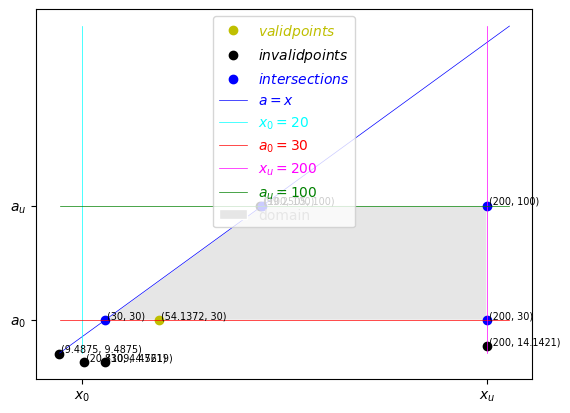

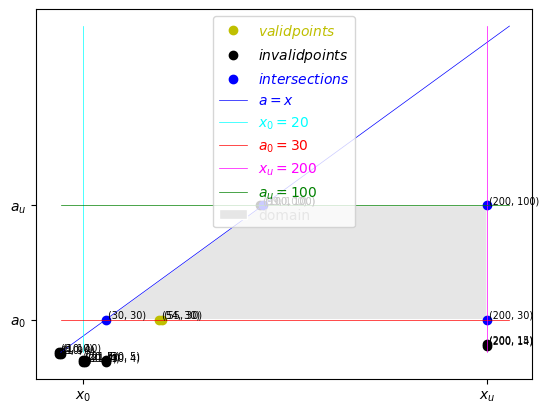

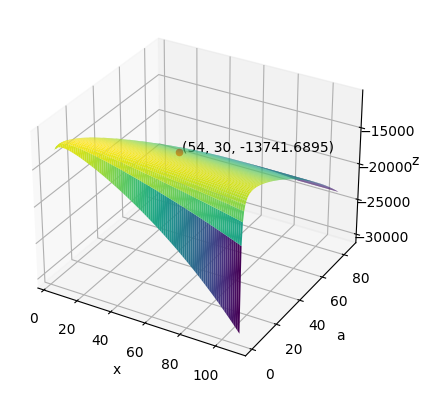

In [555]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
import itertools


r1 = Decimal(0.99)
r2 = Decimal(0.99)
c = Decimal(1)
t = Decimal(10000)

x0 = 20
a0 = 30

xu = 200
au = 100


def f(x, a, t, r1, r2, c):
    result = (-1 / x - 1) * t / ((r1 ** (x / a - 1)) * (r2 ** (a - 1)) * c) * (x >= a)
    try:
        result[result == 0] = np.nan
    except:
        pass
    return result


def interor_solutions(r1, r2):
    a = float(-r1.ln() / (2 * r2.ln() ** 2))
    b = float(
        (r1.ln() ** 2 / (4 * r2.ln() ** 4) + r1.ln() ** 3 / (27 * r2.ln() ** 3)).sqrt()
    )
    return Decimal(np.cbrt(a + b) + np.cbrt(a - b))


def sec_der1(r1, r2, a, x, c):
    bxx = (
        -t
        * (r1.ln() * (r1.ln() * x**3 + x**2 + 2 * a * x) + 2 * a**2)
        / (a**2 * r1 ** (x / a) * r2 ** (a - 1) * c * x**3)
    )
    baa = (t * r1.ln() / c) * (
        (2 * a + r1.ln() - r2.ln() * x * a**2)
        / (r1 ** (x / a - 1) * r2 ** (a - 1) * a**4)
    ) * (1 + x) + (r2.ln() / (x * c)) * (
        (-x * r1.ln() + r2.ln() * a**2) / (r1 ** (x / a - 1) * r2 ** (a - 1) * a**2)
    )
    bxa = (
        (a + x * r1.ln() + r2.ln() * a**2) * t * r1.ln() * (1 + x)
        + a * x * c * (r1.ln() - r2.ln() * a**2)
    ) / (x * c * r1 ** (x / a - 1) * r2 ** (a - 1) * a**3)
    delta = bxx * baa - bxa**2
    return bxx, baa, bxa, delta


def boundary_x(x, r1, r2):
    a = (x * r1.ln() / r2.ln()).sqrt()
    return a


def boundary_x_a(a, r):
    x = (-r.ln() - (r.ln() ** 2 - 4 * a * r.ln()).sqrt()) / (2 * r.ln())
    return x


opt_a = interor_solutions(r1, r2)

opt_x = opt_a**2 * r2.ln() / r1.ln()
bxx, baa, bxa, delta = sec_der1(r1, r2, opt_a, opt_x, c)
print(bxx,delta)
opt_bound_x_y = (float(boundary_x_a(1, r2)), float(boundary_x_a(1, r2)))
opt_bound_x0 = (x_0, float(boundary_x(x0, r1, r2)))
opt_bound_a0 = (float(boundary_x_a(a0, r1)), a0)
points = [opt_bound_x_y, opt_bound_x0, opt_bound_a0]


if xu is not None:
    opt_bound_xu = (xu, float(boundary_x(xu, r1, r2)))
    points.append(opt_bound_xu)
    print(opt_bound_xu)
    
if au is not None:
    opt_bound_au = (float(boundary_x_a(au, r1)), au)
    points.append(opt_bound_au)
    print(opt_bound_au)

if bxx<=0 and delta > -0.0001:
    points.append((float(opt_x), float(opt_a)))

numerical_pts = []
for point in points:
    p_x, p_y = point
    if int(p_x) != p_x:
        a = [int(p_x), int(p_x) + 1]
    else:
        a = [int(p_x)]
    if int(p_y) != p_y:
        b = [int(p_y), int(p_y) + 1]
    else:
        b = [int(p_y)]
    numerical_pts += list(itertools.product(a, b))


valid, invalid, intersections = domain_plot(x0, a0, xu, au, points)
num_valid, num_invalid, intersections = domain_plot(x0, a0, xu, au, numerical_pts)


max_result = None
max_pt = None
for pt in list(set(valid + intersections)):
    pt_v = f(pt[0], float(pt[1]), float(t), float(r1), float(r2), float(c))
    if max_result is None or pt_v > max_result:
        max_result = pt_v
        max_pt = pt

print("optimal solution (x, a) and function value: ", max_pt, ",", max_result)
print()

max_num_result = None
max_num_pt = None
for pt in list(set(num_valid)):
    pt_v = f(pt[0], pt[1], float(t), float(r1), float(r2), float(c))
    if max_num_result is None or pt_v > max_num_result:
        max_num_result = pt_v
        max_num_pt = pt

print(
    "optimal numerical solution (x, a) and function value: ",
    max_num_pt,
    ",",
    max_num_result,
)


x = np.linspace(
    max(int(max_num_pt[0] - 50), 1),
    int(max_num_pt[0] + min(50 * (max(max_num_pt[0], max_num_pt[1]) / 50), 200)) + 1,
    100,
)
a = np.linspace(
    max(int(max_num_pt[1] - 50), 1),
    int(max_num_pt[1] + min(50 * (max(max_num_pt[0], max_num_pt[1]) / 50), 200)) + 1,
    100,
)

# x = np.linspace(-200,200,100)
# a = np.linspace(-200,200,100)

X, Y = np.meshgrid(x, a)

Z = f(X, Y, float(t), float(r1), float(r2), float(c))


fig = plt.figure()
ax = plt.axes(projection="3d")
# ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.scatter(max_num_pt[0], max_num_pt[1], max_num_result, color="red", s=20, alpha=1)
ax.set_xlabel("x")
ax.set_ylabel("a")
ax.set_zlabel("z")
ax.text(
    max_num_pt[0] + 1,
    max_num_pt[1] + 1,
    max_num_result,
    "({}, {}, {})".format(max_num_pt[0], max_num_pt[1], round(max_num_result, 4)),
    None,
)

### Regression approach to estimate r1/r2:
If we apply natural logarithm to both side of $T(x)$, and shuffle the terms we get the following equation:

$$ln(\frac{T(x)\cdot x \cdot c}{t})=-ln(r_1) \cdot (\frac{x}{a}-1)-ln(r_2) \cdot (a-1) \qquad \qquad (1)$$

Let $T=[\tau_1,\tau_2,...,\tau_k]'$ be observed project times, $\mathbf{y}=[y_1,y_0,...,y_k]'$ where $y_i=ln(\frac{\tau_i+x_i+c_i}{t_i})$, $\beta=[-ln(r_1),-ln(r_2)]'$ where $r_1 \in (0,1],\quad r_2 \in (0,1]$ and

$$
\mathbf{X}_{k,2} = 
 \begin{pmatrix}
  \frac{x_1}{a_1}-1 & a_1-1\\
  \frac{x_2}{a_2}-1 & a_2-1\\
  \vdots  & \vdots\\
  \frac{x_k}{a_k}-1 & a_k-1 
 \end{pmatrix}
$$

The quation (1) then can be rewriten as a matrix formulation of a regression model

$$\mathbf{y}=\mathbf{X}\beta+\varepsilon \qquad \qquad (2)$$

We can estimate $\beta$ by solveing the non-negative least squares

$$\hat{\beta}=\operatorname*{arg\,max}_\beta\|\mathbf{X}\beta-\mathbf{y}\|_2^2,\quad \beta\geq\mathbf{0} \qquad \qquad (3)$$



In [50]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
import pandas as pd


sample_size = 1000


project_t_1 = 10000
project_t_2 = 20000


assignee_1 = 100
assignee_2 = 150


t = np.random.randint(project_t_1, project_t_2, sample_size)
x = np.random.randint(assignee_1, assignee_2, sample_size)
a = [np.random.randint(int(x[i] / 10), x[i] / 2) for i in range(sample_size)]

# target coefficients
r1_true = 0.89
r2_true = 0.83
true_coeff = [-math.log(r1_true), -math.log(r2_true)]
X = np.asarray([[x[i] / a[i] - 1, a[i] - 1] for i in range(sample_size)])


y_true = np.dot(X, true_coeff)

c = 1 + np.random.uniform(-0.1, 0.1, size=(sample_size,))


tau = np.rint(
    np.exp(y_true + np.log(t) - np.log(x) - np.log(c))
    + np.random.normal(0, (project_t_1 + project_t_2) / 400, size=(sample_size,))
)


y = np.log(tau) + np.log(x) + np.log(c) - np.log(t)

df1 = pd.DataFrame(
    {
        "true y": y_true,
        "noisy y": y,
        "x": x,
        "tau": tau,
        "t": t,
        "a": a,
        "c": c,
    }
)

df1 = df1.head(5).style

df1 = df1.set_caption("Table 2-1: Generated random samples (top 5)")

display(df1)


,true y,noisy y,x,tau,t,a,c
0,5.594958,5.593153,123,39319.000000,19455,29,1.080436
1,6.230927,6.229398,109,84160.000000,16400,33,0.907204
2,10.789559,10.789553,142,6118220.000000,17429,58,0.973201
3,7.540708,7.540473,134,281650.000000,18657,40,0.930707
4,5.823080,5.824343,138,27899.000000,11079,30,0.973896


In [48]:
r1_l = []
r2_l = []

r1_diff = []
r2_diff = []
scores = []
kfold = 20

best_r1 = None
best_r2 = None
max_R2 = 0


for i in range(kfold):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    reg_nnls = LinearRegression(positive=True)
    reg_mode = reg_nnls.fit(X_train, y_train)
    r1_ln, r2_ln = reg_nnls.coef_
    r1 = math.exp(-r1_ln)
    r2 = math.exp(-r2_ln)
    r1_l.append(r1)
    r2_l.append(r2)
    r1_diff.append(r1 - r1_true)
    r2_diff.append(r2 - r2_true)
    y_pred = reg_mode.predict(X_test)
    r2_score_v = r2_score(y_test, y_pred)
    if r2_score_v > max_R2:
        max_R2 = r2_score_v
        best_r1 = r1
        best_r2 = r2
    scores.append(r2_score_v)


df2 = pd.DataFrame(
    {
        "best r1": [best_r1],
        "best r2": [best_r2],
        "best R2 score": [max_R2],
        "r1 - true r1": [best_r1 - r1_true],
        "r2 - true r2": [best_r2 - r2_true],
        "average r1": [sum(r1_l) / len(r1_l)],
        "average r2": [sum(r2_l) / len(r2_l)],
        "average R2 score": [sum(scores) / len(scores)],
        "avg r1 - true r1": [sum(r1_l) / len(r1_l) - r1_true],
        "avg r2 - true r2": [sum(r2_l) / len(r2_l) - r2_true],
    }
)
df2 = df2.style.set_caption("Table 2-2: Estimated r1,r2")
display(df2)


,best r1,best r2,best R2 score,r1 - true r1,r2 - true r2,average r1,average r2,average R2 score,avg r1 - true r1,avg r2 - true r2
0,0.890474,0.830005,0.999995,0.000474,0.000005,0.890469,0.830013,0.999990,0.000469,0.000013
